Введём функцию поиска минимума функции методом парабол. 
Разложим f(x) в ряд тейлора до квадратичного члена в точке xi. f(x) ≈ f(xi) + f'(xi) * (x - xi) + f''(xi) * (x - xi) ^ 2. Минимум этой параболы лежит в точке x = xi - f'(xi) / f''(xi). Вычисляя производные по формулам f'(xi) = (f(xi + h) - f(xi - h)) / 2h и f''(xi) = (f(x + h) - 2 * f(x) + f(x - h)) / h ^ 2, будем уменьшать h, добиваясь необходимой точности.

На вход функция получает исходную функцию, радиус, внутри которого лежит экстремум, и необходимую точность.

In [1]:
def mimimum(x, h, eps):
    while h > eps:
        h /= 2
        num = f(x + h) - f(x - h)
        den = f(x + h) - 2 * f(x) + f(x - h)
        if den > 0:
            x -= (h * num) / (2 * den)
        else:
            x += h
    return x

Найдём минимум параболы, смещённой на 5. Начнём от точки 0 и зададим радиус 6

In [2]:
def f(x):
    return (x - 5) ** 2

print(mimimum(0, 6 , 10 ** -10))

5.0


Теперь найдём минимум синуса в 3pi/2

In [3]:
import math

def f(x):
    return math.sin(x)

a = mimimum(5, 0.4, 10 ** -10)
print(a, a - 3 * math.pi / 2)

4.712388992212487 1.1827797408159313e-08


Введём функцию, являющуюся суммой нескольких тригонометрических, и посторим её график

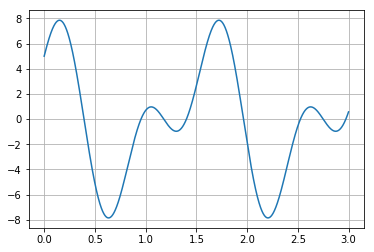

In [4]:
def f(x):
    return 4 * math.sin(8 * x) + 5 * math.cos(4 * x)

import numpy
import matplotlib.pyplot
x = numpy.arange(0, 3, 0.001)
y = [f(i) for i in x]
matplotlib.pyplot.plot(x, y)
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()

Видно, что на заданном отрезке у функции минимумы около значений: 0,5; 1,3; 2,2. Найдём их точные положения

In [5]:
min1 = mimimum(0.5, 0.2, 10 ** -10)
min2 = mimimum(1.3, 0.2, 10 ** -10)
min3 = mimimum(2.2, 0.2, 10 ** -10)
print(min1, min2, min3)

0.6344057276854046 1.3016124895746222 2.205202055795571


Покажем их на графике 

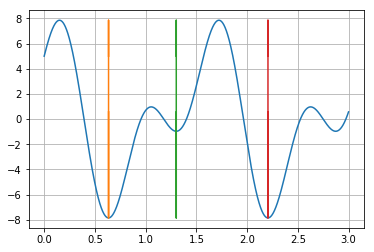

In [6]:
x1 = [min1 for i in x]
x2 = [min2 for i in x]
x3 = [min3 for i in x]
matplotlib.pyplot.plot(x, y)
matplotlib.pyplot.plot(x1, y)
matplotlib.pyplot.plot(x2, y)
matplotlib.pyplot.plot(x3, y)
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()